# Recreating figure
# May 29, 2017

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mesh_mask = xr.open_dataset('/home/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')
VAT26 = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/VAT26/SalishSea_1h_20150507_20150509_grid_T_20150508-20150508.nc')

In [3]:
V = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/VAT26/SalishSea_1h_20150507_20150509_grid_V_20150508-20150508.nc')
U = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/VAT26/SalishSea_1h_20150507_20150509_grid_U_20150508-20150508.nc')

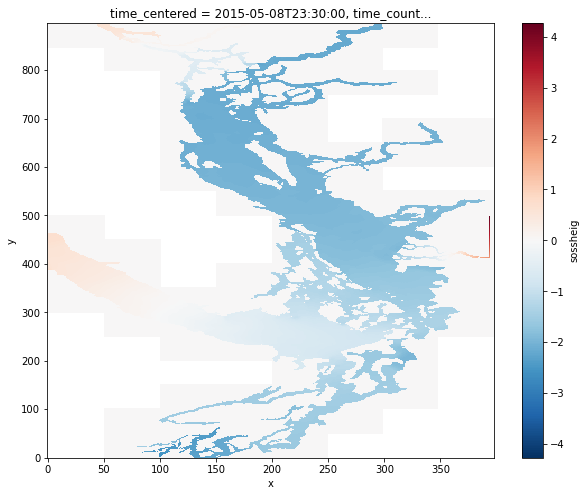

In [4]:
VAT26.sossheig.isel(time_counter=23).plot(figsize=((10,8)))

In [5]:
umask = mesh_mask.umask
vmask = mesh_mask.vmask
tmask= mesh_mask.tmask

In [6]:
restart = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/VAT26/SalishSea_00516241_restart.nc')

In [11]:
mesh_mask

<xarray.Dataset>
Dimensions:       (t: 1, x: 398, y: 898, z: 40)
Dimensions without coordinates: t, x, y, z
Data variables:
    nav_lon       (y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    nav_lat       (y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    nav_lev       (z) float32 0.5 1.5 2.50001 3.50003 4.50007 5.50015 ...
    time_counter  (t) float64 0.0
    tmask         (t, z, y, x) int8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
    umask         (t, z, y, x) int8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
    vmask         (t, z, y, x) int8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
    fmask         (t, z, y, x) int8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
    tmaskutil     (t, y, x) int8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
    umaskutil     (t, y, x) int8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
    vmaskutil     (t, y, x) int8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
    fmaskutil     (t, y, x) int8 0 0 0 0 0 

In [8]:
restart

<xarray.Dataset>
Dimensions:       (t: 1, x: 398, y: 898, z: 40)
Dimensions without coordinates: t, x, y, z
Data variables:
    nav_lon       (y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    nav_lat       (y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    nav_lev       (z) float32 0.5 1.5 2.50001 3.50003 4.50007 5.50015 ...
    time_counter  (t) float64 5.162e+05
    kt            float64 5.162e+05
    ndastp        float64 2.015e+07
    adatrj        float64 239.0
    ssh_ibb       (t, y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    rnf_b         (t, y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    rnf_hc_b      (t, y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    rnf_sc_b      (t, y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    utau_b        (t, y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    vtau_b        (t, y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    qns_b       

In [10]:
restart.fse3t_n.isel(t=0)

<xarray.DataArray 'fse3t_n' (z: 40, y: 898, x: 398)>
[14296160 values with dtype=float64]
Dimensions without coordinates: z, y, x

In [20]:
hu_0 = mesh_mask.e3u_0 * umask
hu = hu_0.sum(dim='z').isel(t=0)
hu

<xarray.DataArray (y: 898, x: 398)>
array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])
Dimensions without coordinates: y, x

In [21]:
hv_0 = mesh_mask.e3v_0 * vmask
hv = hv_0.sum(dim='z').isel(t=0)
hv

<xarray.DataArray (y: 898, x: 398)>
array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])
Dimensions without coordinates: y, x